In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns; sns.set()

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

In [41]:
h_list = np.array([1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0])

In [42]:
tup1 = [0,0,0,1,1]
tup2 = [0,2,4,1,3]

In [43]:
DataAct = pd.read_csv("ParametrosActivadores.csv", index_col=[0,1])
DataRep = pd.read_csv("ParametrosRepresores.csv", index_col=[0,1])

In [44]:
def firstorder_model(x,m,b):
    return m*x+b

[-0.00356368  0.01491776] 0.8890030942410447 [4.44304647e-07 3.34880255e-06]
[ 49.19557792 -24.99011335] 0.9910583942620758 [ 6.1122868  29.77443821]
[ 0.00116548 -0.0003283 ] 0.7308794480815993 [9.35631442e-08 7.05201942e-07]


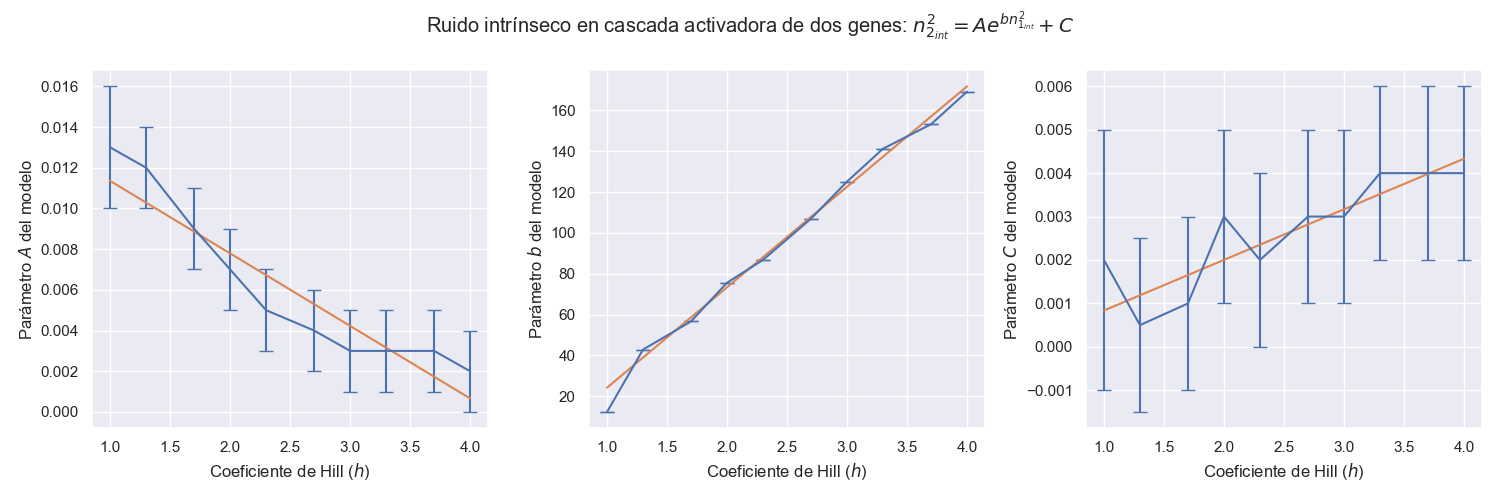

In [45]:
ActSystem = "Intrínseco 2 genes: n2 = Ae^(b n1) + C"
params = ["A", "b", "C"]

fig = plt.figure(figsize=(5*len(params),5))
for i_param in range(len(params)):
    ActData = [float(DataAct[ActSystem][params[i_param]][h_i].split(" +/- ")[0]) for h_i in h_list]
    ActVar = [float(DataAct[ActSystem][params[i_param]][h_i].split(" +/- ")[1]) for h_i in h_list]

    ax = fig.add_subplot(1, len(params), i_param+1)
    ax.errorbar(h_list, ActData, ActVar, capsize=5, label="Activator")

    ax.set_xlabel(r"Coeficiente de Hill ($h$)")#, fontsize=15)
    ax.set_ylabel(fr"Parámetro ${params[i_param]}$ del modelo")#, fontsize=15)
    # plt.xticks(fontsize=20)
    # plt.yticks(fontsize=20)
    # plt.legend()

    fitparams, fitcov = curve_fit(firstorder_model, h_list, ActData, sigma=ActVar)
    residuals = ActData - firstorder_model(h_list, *fitparams)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ActData-np.mean(ActData))**2)
    print(fitparams, 1 - (ss_res / ss_tot), 1.96*np.diag(fitcov))

    plt.plot(h_list, firstorder_model(h_list, *fitparams))

plt.suptitle(fr"Ruido intrínseco en cascada activadora de dos genes: $n_{{2_{{int}}}}^2 = Ae^{{ b n_{{1_{{int}}}}^2}} + C$")#, fontsize=25)
plt.tight_layout()
plt.savefig("GraficasParaGuardar/ParametrosFinales/Intrinseco2activadores.jpg", dpi=1000)


[ 0.68372946 -0.92126931] 0.8329175369368281 [0.02369983 0.14729741]
[21.56913682 93.4040745 ] 0.8659278209611592 [ 25.28865641 128.49705759]
[0.00524892 0.01847771] 0.8531250362684678 [1.16209254e-06 8.33685190e-06]


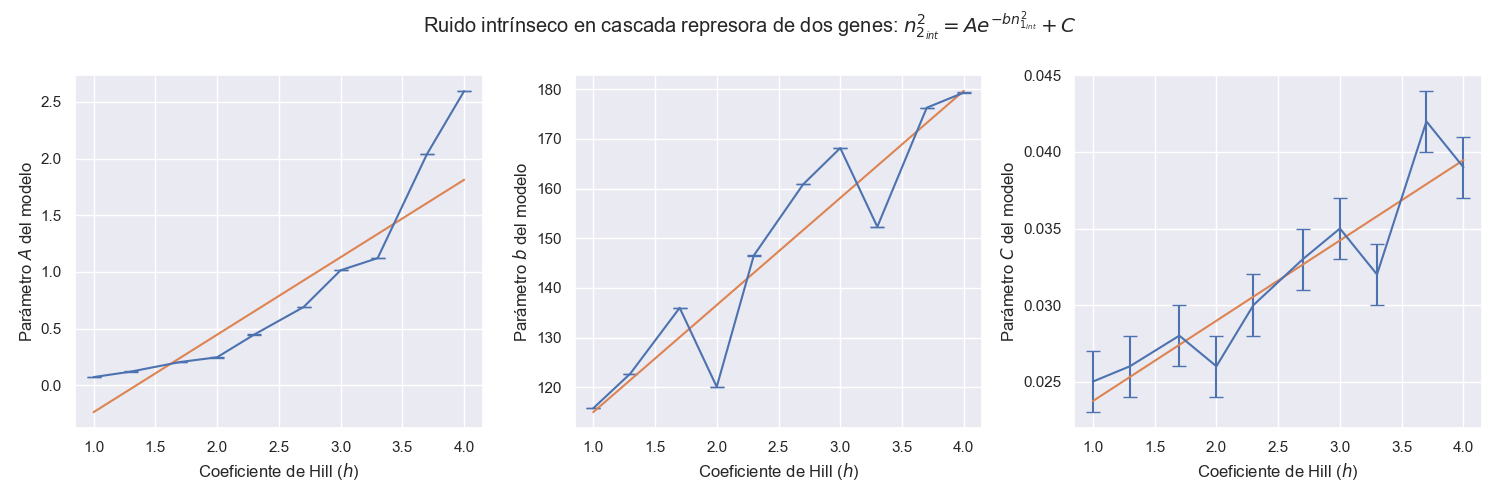

In [46]:
RepSystem = "Intrínseco 2 genes: n2 = Ae^(-b n1) + C"
params = ["A", "b", "C"]

fig = plt.figure(figsize=(5*len(params),5))
for i_param in range(len(params)):
    RepData = [float(DataRep[RepSystem][params[i_param]][h_i].split(" +/- ")[0]) for h_i in h_list]
    RepVar = [float(DataRep[RepSystem][params[i_param]][h_i].split(" +/- ")[1]) for h_i in h_list]

    ax = fig.add_subplot(1, len(params), i_param+1)
    ax.errorbar(h_list, RepData, RepVar, capsize=5, label="Repressor")

    ax.set_xlabel(r"Coeficiente de Hill ($h$)")#, fontsize=15)
    ax.set_ylabel(fr"Parámetro ${params[i_param]}$ del modelo")#, fontsize=15)
    # plt.xticks(fontsize=20)
    # plt.yticks(fontsize=20)
    # plt.legend()

    fitparams, fitcov = curve_fit(firstorder_model, h_list, RepData, sigma=RepVar)
    residuals = RepData - firstorder_model(h_list, *fitparams)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((RepData-np.mean(RepData))**2)
    print(fitparams, 1 - (ss_res / ss_tot), 1.96*np.diag(fitcov))

    plt.plot(h_list, firstorder_model(h_list, *fitparams))
    
plt.suptitle(fr"Ruido intrínseco en cascada represora de dos genes: $n_{{2_{{int}}}}^2 = Ae^{{- b n_{{1_{{int}}}}^2}} + C$")#, fontsize=25)
plt.tight_layout()
plt.savefig("GraficasParaGuardar/ParametrosFinales/Intrinseco2represores.jpg", dpi=1000)

[-0.29875547  0.27108999] -0.22713798941755714 [0.01663154 0.03205758]
[ 0.09059031 -0.21381498] -0.0749090533907042 [0.00201302 0.00764032]
[ 0.44915051 -0.29719647] -0.13565177155751207 [0.02101604 0.04050303]
Fit desde h=1.3 hasta h=2.7


C:\Users\aleja\AppData\Local\Temp\ipykernel_18372\3976118830.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


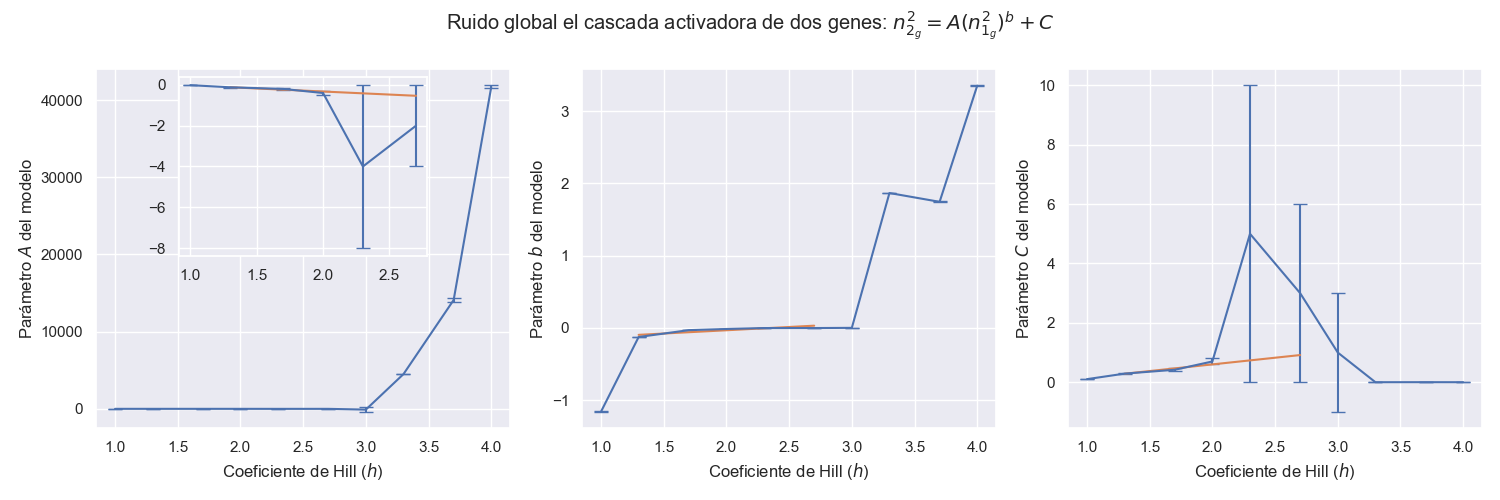

In [47]:
ActSystem = "Global efectivo 2 genes: n2 = A n1^b"
params = ["A", "b", "C"]

fig = plt.figure(figsize=(5*len(params),5))
for i_param in range(len(params)):
    ActData = [float(DataAct[ActSystem][params[i_param]][h_i].split(" +/- ")[0]) for h_i in h_list]
    ActVar = [float(DataAct[ActSystem][params[i_param]][h_i].split(" +/- ")[1]) for h_i in h_list]

    ax = fig.add_subplot(1, len(params), i_param+1)
    ax.errorbar(h_list, ActData, ActVar, capsize=5, label="Activator")

    ax.set_xlabel(r"Coeficiente de Hill ($h$)")#, fontsize=15)
    ax.set_ylabel(fr"Parámetro ${params[i_param]}$ del modelo")#, fontsize=15) 
    # plt.xticks(fontsize=15)
    # plt.yticks(fontsize=15)
    # plt.legend()

    if i_param==0:
        zoom_ax = inset_axes(ax, width='60%', height='50%', loc=9)#, bbox_to_anchor=(0.25,0.1,0.35,0.88))
        zoom_ax.errorbar(h_list[:6], ActData[:6], ActVar[:6], capsize=5)

    fitparams, fitcov = curve_fit(firstorder_model, h_list[1:6], ActData[1:6], sigma=ActVar[1:6])
    residuals = ActData - firstorder_model(h_list, *fitparams)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ActData-np.mean(ActData))**2)
    print(fitparams, 1 - (ss_res / ss_tot), 1.96*np.diag(fitcov))

    plt.plot(h_list[1:6], firstorder_model(h_list[1:6], *fitparams))

print(f"Fit desde h={h_list[1]} hasta h={h_list[5]}")

plt.suptitle(fr"Ruido global el cascada activadora de dos genes: $n_{{2_{{g}}}}^2 = A(n_{{1_{{g}}}}^2)^{{ b}} + C$")#, fontsize=20)
plt.tight_layout()
plt.savefig("GraficasParaGuardar/ParametrosFinales/Global2activadores.jpg", dpi=1000)

[ 4.65021933e-07 -1.55523054e-06] -0.21923506892465316 [1.67223983e-13 1.45121835e-12]
[-5.06174474 24.90456389] -1.7073218431459813 [ 6.33647674 43.27363874]
[-0.00405686  0.01657383] 0.5447062669312577 [1.04742864e-06 9.04061835e-06]
Fit desde h=1.7


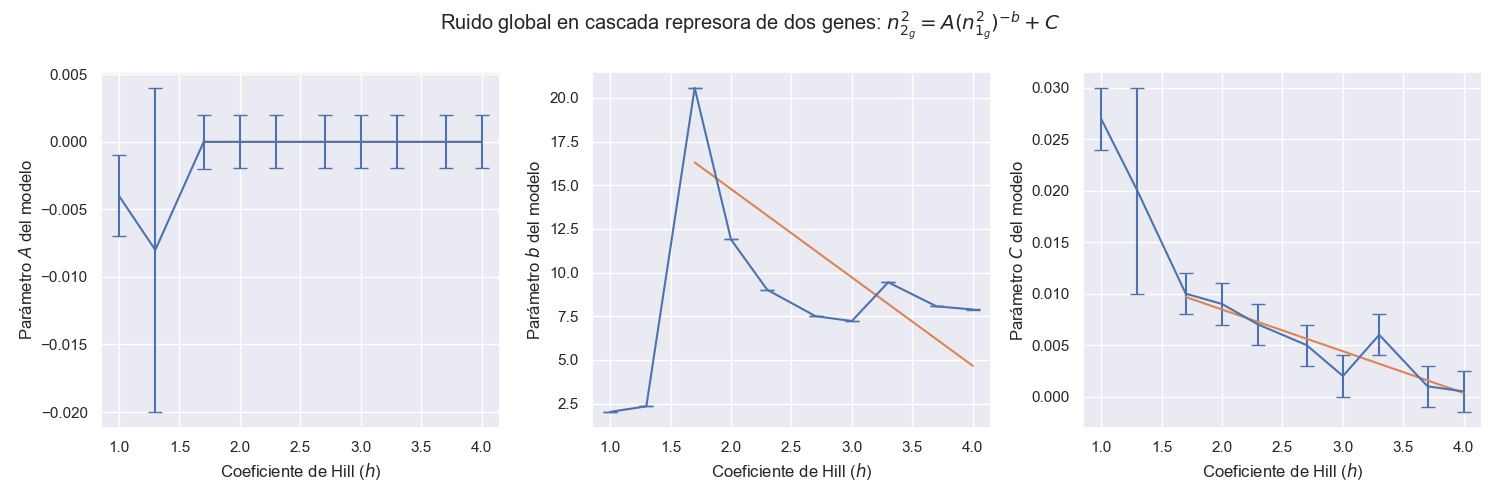

In [48]:
RepSystem = "Global efectivo 2 genes: n2 = A n1^(-b)"
params = ["A", "b", "C"]

fig = plt.figure(figsize=(5*len(params),5))
for i_param in range(len(params)):
    RepData = [float(DataRep[RepSystem][params[i_param]][h_i].split(" +/- ")[0]) for h_i in h_list]
    RepVar = [float(DataRep[RepSystem][params[i_param]][h_i].split(" +/- ")[1]) for h_i in h_list]

    ax = fig.add_subplot(1, len(params), i_param+1)
    ax.errorbar(h_list, RepData, RepVar, capsize=5, label="Repressor")

    ax.set_xlabel(r"Coeficiente de Hill ($h$)")#, fontsize=15)
    ax.set_ylabel(fr"Parámetro ${params[i_param]}$ del modelo")#, fontsize=15)
    # plt.xticks(fontsize=15)
    # plt.yticks(fontsize=15)
    # plt.legend()

    fitparams, fitcov = curve_fit(firstorder_model, h_list[2:], RepData[2:], sigma=RepVar[2:])
    residuals = RepData - firstorder_model(h_list, *fitparams)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((RepData-np.mean(RepData))**2)
    print(fitparams, 1 - (ss_res / ss_tot), 1.96*np.diag(fitcov))

    plt.plot(h_list[2:], firstorder_model(h_list[2:], *fitparams))

print(f"Fit desde h={h_list[2]}")

plt.suptitle(fr"Ruido global en cascada represora de dos genes: $n_{{2_{{g}}}}^2 = A(n_{{1_{{g}}}}^2)^{{- b}} + C$")#, fontsize=20)
plt.tight_layout()
plt.savefig("GraficasParaGuardar/ParametrosFinales/Global2represores.jpg", dpi=1000)

[-0.21407271  0.16889378] -3.07809037661975 [0.00173457 0.0066348 ]
[ 9.13070518 -8.51929606] -0.3808555869936485 [0.27311527 0.8767034 ]
[ 0.22558528 -0.14240635] -0.3141350318490712 [0.00400947 0.01480833]
[1.4175077  5.11604727] 0.5332248016842664 [ 3.36416245 10.11172915]
[-0.00016804  0.00082402] -0.29400424800509706 [1.37664989e-06 5.03545380e-06]
Fit hasta h=2.7


C:\Users\aleja\AppData\Local\Temp\ipykernel_18372\3851726539.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


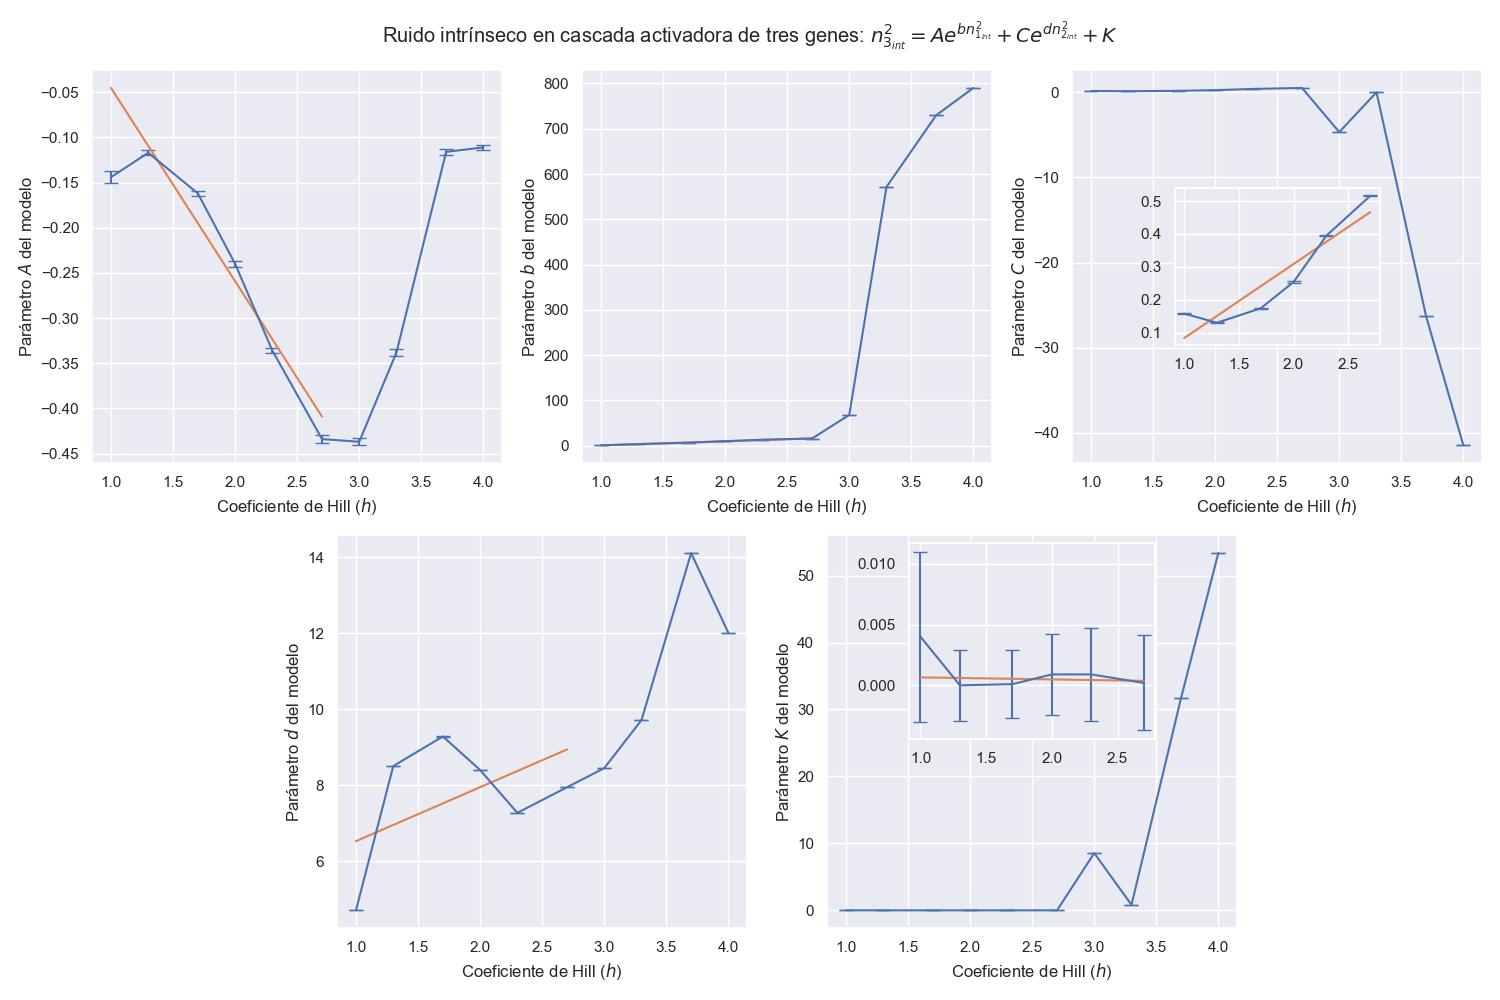

In [49]:
ActSystem = "Intrínseco 3 genes n3: = A e^(b n1) + C e^(d n2) + k"
params = ["A", "b", "C", "d", "K"]

fig = plt.figure(figsize=(5*(1+len(params)//2),2*5))
for i_param in range(len(params)):
    ActData = [float(DataAct[ActSystem][params[i_param]][h_i].split(" +/- ")[0]) for h_i in h_list]
    ActVar = [float(DataAct[ActSystem][params[i_param]][h_i].split(" +/- ")[1]) for h_i in h_list]

    # ax = fig.add_subplot(2, 1+len(params)//2, i_param+1)
    ax = plt.subplot2grid((2,6), (tup1[i_param], tup2[i_param]), colspan=2)
    ax.errorbar(h_list, ActData, ActVar, capsize=5, label="Activator")

    ax.set_xlabel(r"Coeficiente de Hill ($h$)")#, fontsize=15)
    ax.set_ylabel(fr"Parámetro ${params[i_param]}$ del modelo")#, fontsize=15)
    # plt.xticks(fontsize=20)
    # plt.yticks(fontsize=20)
    # plt.legend()

    if i_param==4:
        zoom_ax = inset_axes(ax, width='60%', height='50%', loc=9)
        zoom_ax.errorbar(h_list[:6], ActData[:6], ActVar[:6], capsize=5)

    if i_param==2:
        zoom_ax = inset_axes(ax, width='50%', height='40%', loc=10)
        zoom_ax.errorbar(h_list[:6], ActData[:6], ActVar[:6], capsize=5)

    # if i_param==1:
    #     zoom_ax = inset_axes(ax, width='60%', height='50%', loc=9)
    #     zoom_ax.errorbar(h_list[:6], ActData[:6], ActVar[:6], capsize=5)

    fitparams, fitcov = curve_fit(firstorder_model, h_list[:6], ActData[:6], sigma=ActVar[:6])
    residuals = ActData - firstorder_model(h_list, *fitparams)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ActData-np.mean(ActData))**2)
    print(fitparams, 1 - (ss_res / ss_tot), 1.96*np.diag(fitcov))

    plt.plot(h_list[:6], firstorder_model(h_list[:6], *fitparams))

print(f"Fit hasta h={h_list[5]}")

plt.suptitle(fr"Ruido intrínseco en cascada activadora de tres genes: $n_{{3_{{int}}}}^2 = Ae^{{ b n_{{1_{{int}}}}^2}} + Ce^{{ d n_{{2_{{int}}}}^2}} + K$")#, fontsize=25)
plt.tight_layout()
plt.savefig("GraficasParaGuardar/ParametrosFinales/Intrinseco3activadores.jpg", dpi=1000)

[ 0.00424106 -0.00656469] -0.11111111111111116 [4.39479343e-06 1.58850301e-05]
[-32.98746703 -67.20690511] -0.18591598504379458 [ 2544.58722758 10369.19302315]
[ 0.28401827 -0.32933333] 0.5653714150977556 [0.00673946 0.02336909]
[ 1.63932236 43.5344449 ] -1.589315140798456 [0.30128986 0.94550118]
[-0.00484018  0.02333333] -2.502843503838393 [3.10585678e-07 1.07695584e-06]
Fit desde h=1.3 hasta h=2.3


C:\Users\aleja\AppData\Local\Temp\ipykernel_18372\4240496500.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


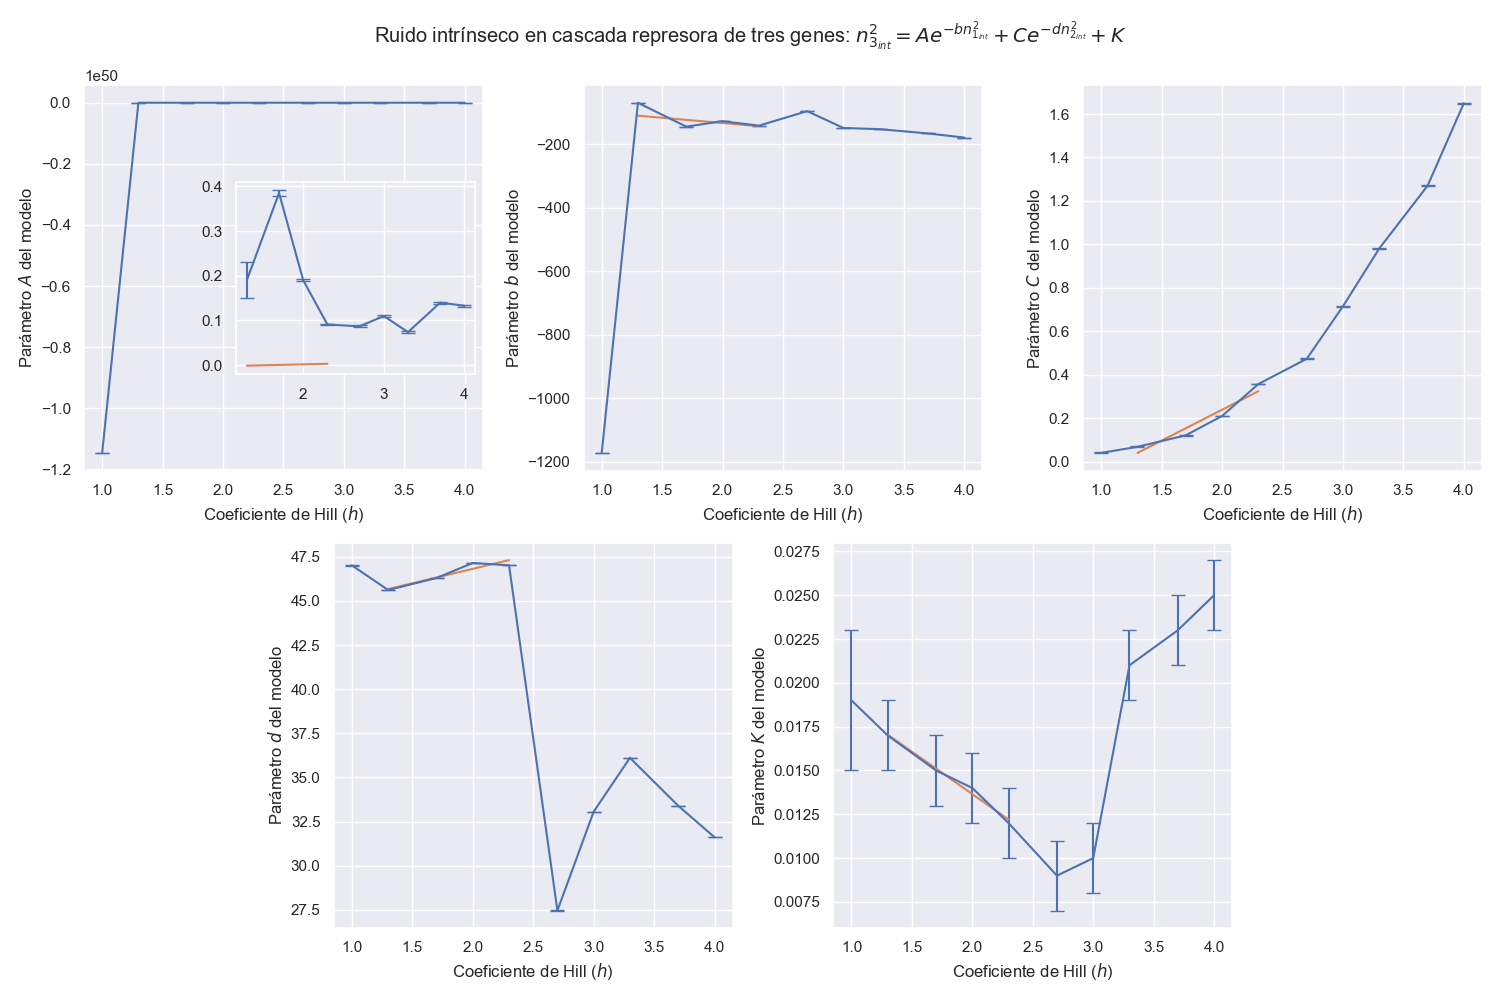

In [54]:
RepSystem = "Intrínseco 3 genes n3: = A e^(-b n1) + C e^(-d n2) + k"
params = ["A", "b", "C", "d", "K"]

fig = plt.figure(figsize=(5*(1+len(params)//2),2*5))
for i_param in range(len(params)):
    RepData = [float(DataRep[RepSystem][params[i_param]][h_i].split(" +/- ")[0]) for h_i in h_list]
    RepVar = [float(DataRep[RepSystem][params[i_param]][h_i].split(" +/- ")[1]) for h_i in h_list]

    # ax = fig.add_subplot(2, 1+len(params)//2, i_param+1)
    ax = plt.subplot2grid((2,6), (tup1[i_param], tup2[i_param]), colspan=2)
    ax.errorbar(h_list, RepData, RepVar, capsize=5, label="Repressor")

    ax.set_xlabel(r"Coeficiente de Hill ($h$)")#, fontsize=15)
    ax.set_ylabel(fr"Parámetro ${params[i_param]}$ del modelo")#, fontsize=15)
    # plt.xticks(fontsize=20)
    # plt.yticks(fontsize=20)
    # plt.legend()

    if i_param==0:
        zoom_ax = inset_axes(ax, width='60%', height='50%', loc=5)
        zoom_ax.errorbar(h_list[1:], ActData[1:], ActVar[1:], capsize=5)

    fitparams, fitcov = curve_fit(firstorder_model, h_list[1:5], RepData[1:5], sigma=RepVar[1:5])
    residuals = RepData - firstorder_model(h_list, *fitparams)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((RepData-np.mean(RepData))**2)
    print(fitparams, 1 - (ss_res / ss_tot), 1.96*np.diag(fitcov))

    plt.plot(h_list[1:5], firstorder_model(h_list[1:5], *fitparams))

print(f"Fit desde h={h_list[1]} hasta h={h_list[4]}")

plt.suptitle(fr"Ruido intrínseco en cascada represora de tres genes: $n_{{3_{{int}}}}^2 = Ae^{{- b n_{{1_{{int}}}}^2}} + Ce^{{- d n_{{2_{{int}}}}^2}} + K$")#, fontsize=25)
plt.tight_layout()
plt.savefig("GraficasParaGuardar/ParametrosFinales/Intrinseco3represores.jpg", dpi=1000)

[-25.02352508  39.5152838 ] -0.11534449094484756 [ 375.59258145 1117.78183934]
[ 1.67445948 -2.26843247] -0.11111112857413863 [0.93508766 2.67435071]
[ 3.21340424 -3.42973402] -0.11111111111042926 [1.2783461  3.32486204]
[ 0.53040541 -0.20067568] 0.8228638942945964 [4.73535389e-05 1.35431122e-04]
[-0.57485827  1.34106236] 0.013096930569439724 [0.0889503  0.34548859]
Fit desde h=1.3 hasta h=2.0


C:\Users\aleja\AppData\Local\Temp\ipykernel_18372\1224346980.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


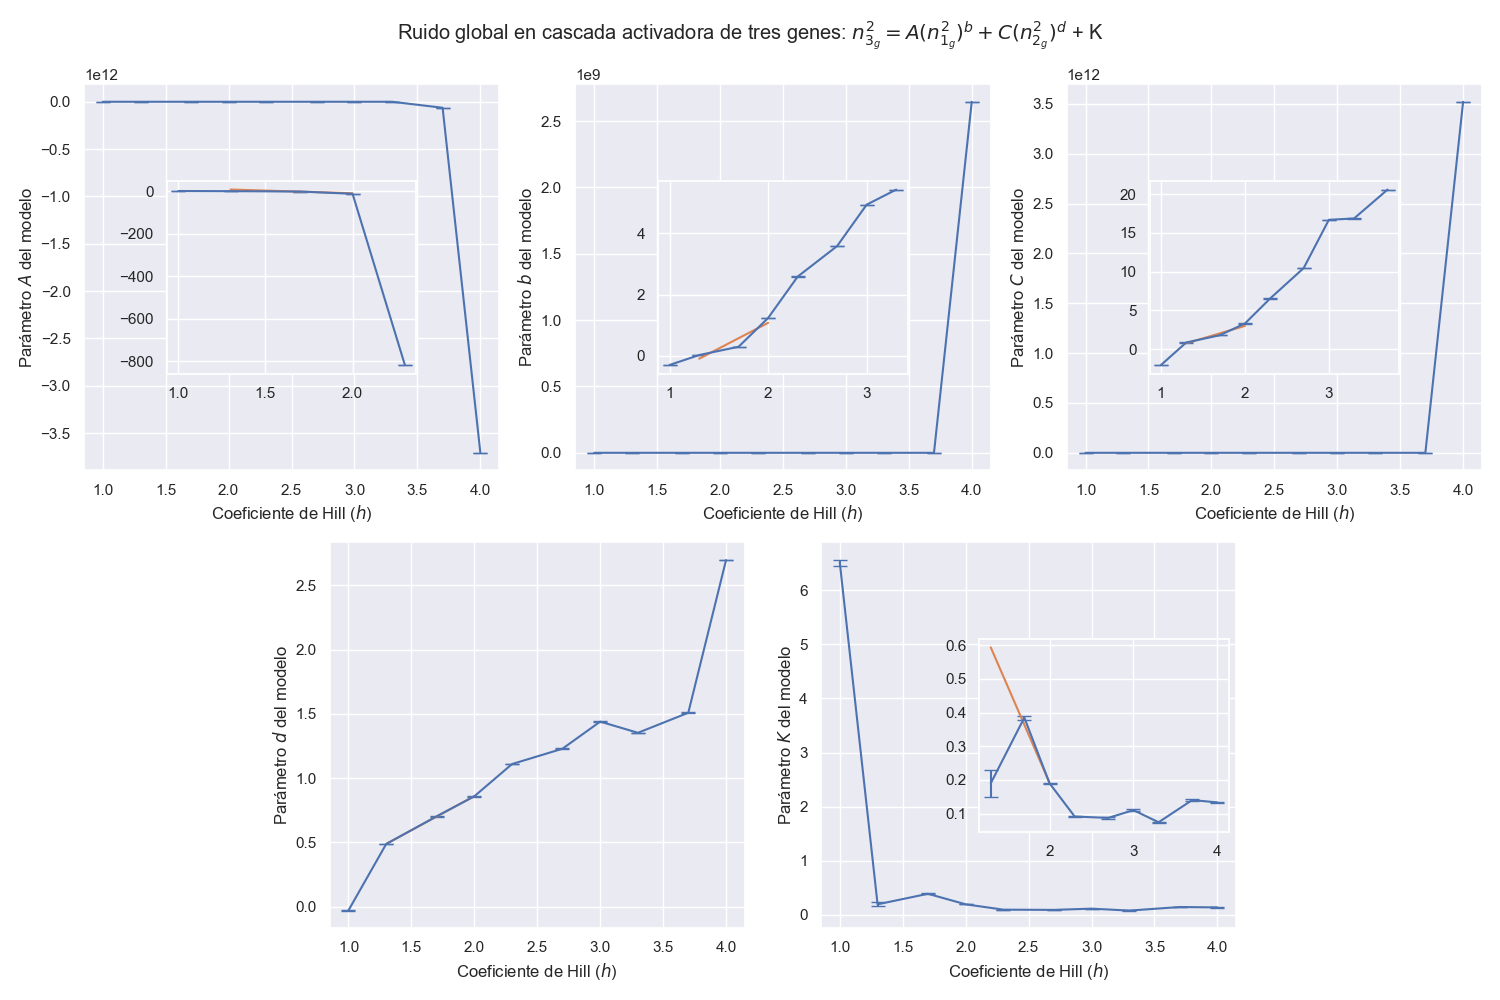

In [51]:
ActSystem = "Global efectivo 3 genes: n3^2 = A n1^b + C n2^d"
params = ["A", "b", "C", "d", "K"]

fig = plt.figure(figsize=(5*(1+len(params)//2),2*5))
for i_param in range(len(params)):
    ActData = [float(DataAct[ActSystem][params[i_param]][h_i].split(" +/- ")[0]) for h_i in h_list]
    ActVar = [float(DataAct[ActSystem][params[i_param]][h_i].split(" +/- ")[1]) for h_i in h_list]

    # ax = fig.add_subplot(2, 1+len(params)//2, i_param+1)
    ax = plt.subplot2grid((2,6), (tup1[i_param], tup2[i_param]), colspan=2)
    ax.errorbar(h_list, ActData, ActVar, capsize=5, label="Activator")

    ax.set_xlabel(r"Coeficiente de Hill ($h$)")#, fontsize=15)
    ax.set_ylabel(fr"Parámetro ${params[i_param]}$ del modelo")#, fontsize=15)
    # plt.xticks(fontsize=15)
    # plt.yticks(fontsize=15)
    # plt.legend()

    if i_param==0:
        zoom_ax = inset_axes(ax, width='60%', height='50%', loc=10)
        zoom_ax.errorbar(h_list[:5], ActData[:5], ActVar[:5], capsize=5)   

    if i_param==1:
        zoom_ax = inset_axes(ax, width='60%', height='50%', loc=10)
        zoom_ax.errorbar(h_list[:8], ActData[:8], ActVar[:8], capsize=5) 

    if i_param==2:
        zoom_ax = inset_axes(ax, width='60%', height='50%', loc=10)
        zoom_ax.errorbar(h_list[:9], ActData[:9], ActVar[:9], capsize=5)      

    if i_param==4:
        zoom_ax = inset_axes(ax, width='60%', height='50%', loc=5)
        zoom_ax.errorbar(h_list[1:], ActData[1:], ActVar[1:], capsize=5)

    fitparams, fitcov = curve_fit(firstorder_model, h_list[1:4], ActData[1:4], sigma=ActVar[1:4])
    residuals = ActData - firstorder_model(h_list, *fitparams)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ActData-np.mean(ActData))**2)
    print(fitparams, 1 - (ss_res / ss_tot), 1.96*np.diag(fitcov))

    plt.plot(h_list[1:4], firstorder_model(h_list[1:4], *fitparams))

print(f"Fit desde h={h_list[1]} hasta h={h_list[3]}")

plt.suptitle(fr"Ruido global en cascada activadora de tres genes: $n_{{3_{{g}}}}^2 = A(n_{{1_{{g}}}}^2)^{{ b}} + C(n_{{2_{{g}}}}^2)^{{ d}}$ + K")#, fontsize=20)
plt.tight_layout()
plt.savefig("GraficasParaGuardar/ParametrosFinales/Global3activadores.jpg", dpi=1000)

[-0.07382979  0.1146383 ] -0.15600978904746676 [0.00702725 0.01827724]
[-0.41069275  0.9456837 ] -0.12108335246954405 [0.77334906 2.09155767]
[ 4.84998641e-05 -1.23869807e-04] -0.3500901538868808 [5.77267998e-09 1.63577522e-08]
[ 1.35675676 -0.16659461] -5.539854533455637 [0.01633214 0.0467099 ]
[ 0.01233173 -0.0174774 ] 0.13394408878642383 [0.00014605 0.00042838]
Fit desde h=1.3 hasta h=2.0


C:\Users\aleja\AppData\Local\Temp\ipykernel_18372\483170377.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


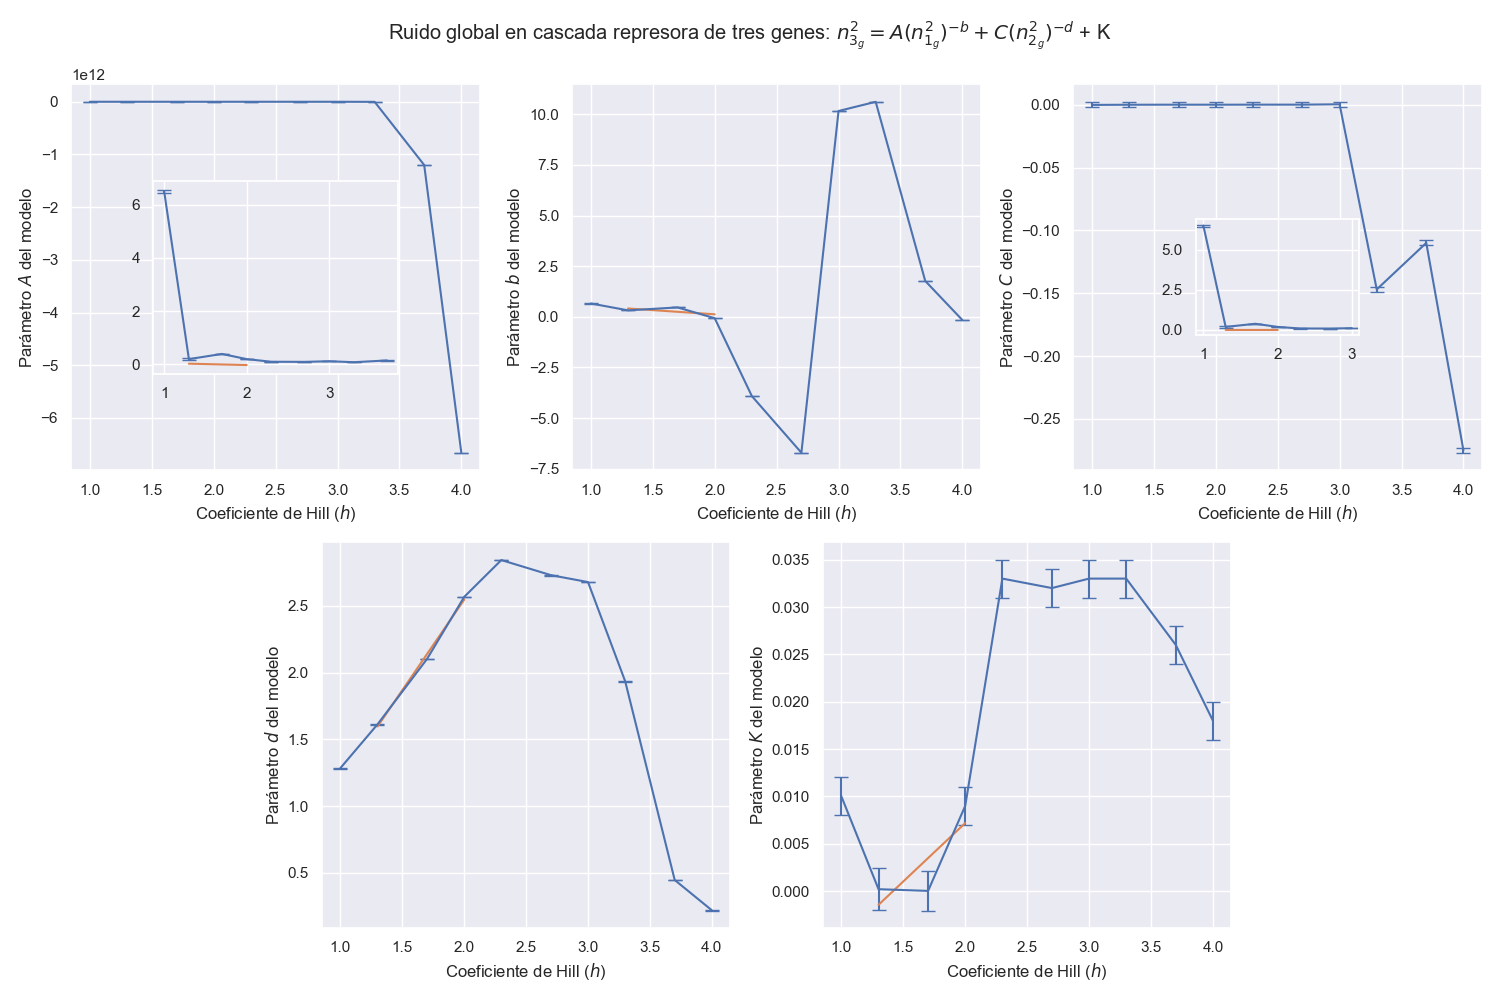

In [52]:
RepSystem = "Global efectivo 3 genes: n3^2 = A n1^(-b) + C n2^(-d)"
params = ["A", "b", "C", "d", "K"]

fig = plt.figure(figsize=(5*(1+len(params)//2),2*5))
for i_param in range(len(params)):
    RepData = [float(DataRep[RepSystem][params[i_param]][h_i].split(" +/- ")[0]) for h_i in h_list]
    RepVar = [float(DataRep[RepSystem][params[i_param]][h_i].split(" +/- ")[1]) for h_i in h_list]

    # ax = fig.add_subplot(2, 1+len(params)//2, i_param+1)
    ax = plt.subplot2grid((2,6), (tup1[i_param], tup2[i_param]), colspan=2)
    ax.errorbar(h_list, RepData, RepVar, capsize=5, label="Repressor")

    ax.set_xlabel(r"Coeficiente de Hill ($h$)")#, fontsize=15)
    ax.set_ylabel(fr"Parámetro ${params[i_param]}$ del modelo")#, fontsize=15)
    # plt.xticks(fontsize=15)
    # plt.yticks(fontsize=15)
    # plt.legend()

    if i_param==0:
        zoom_ax = inset_axes(ax, width='60%', height='50%', loc=10)
        zoom_ax.errorbar(h_list[:9], ActData[:9], ActVar[:9], capsize=5)

    if i_param==2:
        zoom_ax = inset_axes(ax, width='40%', height='30%', loc=10)
        zoom_ax.errorbar(h_list[:7], ActData[:7], ActVar[:7], capsize=5)

    fitparams, fitcov = curve_fit(firstorder_model, h_list[1:4], RepData[1:4], sigma=RepVar[1:4])
    residuals = RepData - firstorder_model(h_list, *fitparams)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((RepData-np.mean(RepData))**2)
    print(fitparams, 1 - (ss_res / ss_tot), 1.96*np.diag(fitcov))

    plt.plot(h_list[1:4], firstorder_model(h_list[1:4], *fitparams))

print(f"Fit desde h={h_list[1]} hasta h={h_list[3]}")

plt.suptitle(fr"Ruido global en cascada represora de tres genes: $n_{{3_{{g}}}}^2 = A(n_{{1_{{g}}}}^2)^{{- b}} + C(n_{{2_{{g}}}}^2)^{{- d}}$ + K")#, fontsize=20)
plt.tight_layout()
plt.savefig("GraficasParaGuardar/ParametrosFinales/Global3represores.jpg", dpi=1000)